# 다중회귀 - 보스턴 주택 가격

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Feature별 산점도와 선형회귀선

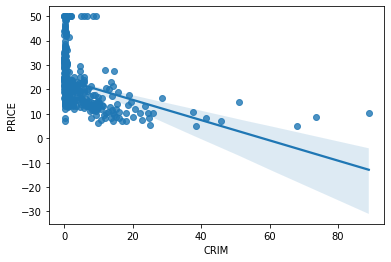

In [8]:
sns.regplot(x='CRIM', y='PRICE', data=df);

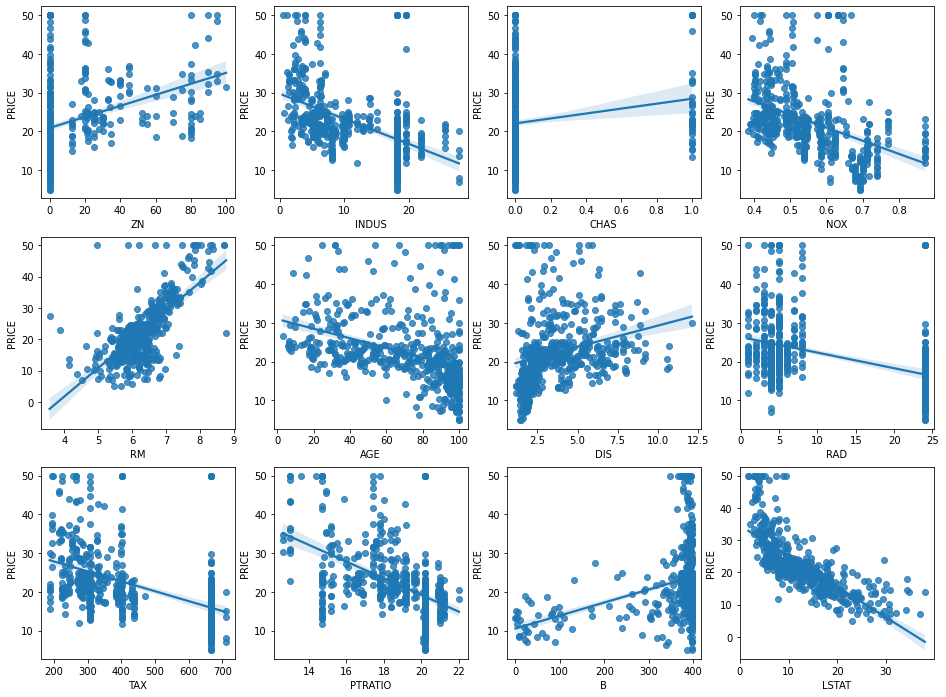

In [9]:
_, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- Feature별 결정계수(R squared)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, boston.target)
    score = lr.score(X, boston.target)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# R-squared
lr.score(X_train, y_train)

0.7444811414684593

In [16]:
# 계수, Weight
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [17]:
# 절편, bias
lr.intercept_

30.950814924201126

- 회귀식
<pre>
y = -1.18 * CRIM + 4.72 * ZN + 4.93 * INDUS + ... + -5.27 * LSTAT

- test 데이터에 적용

In [18]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [19]:
np.dot(lr.coef_, X_test[0]) + lr.intercept_

21.227539118774818

In [20]:
# predict method
lr.predict(X_test[0].reshape(1, -1))        # lr.predict(X_test[:1])

array([21.22753912])

In [27]:
# 10개의 test에 대해 적용
for i in range(10):
    pred1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    pred2 = lr.predict(X_test[i].reshape(1, -1))
    print(f'실제 값: {y_test[i]},\t직접계산 예측 값: {pred1:.4f},\tLR 예측 값: {pred2[0]:.4f}')

실제 값: 20.1,	직접계산 예측 값: 21.2275,	LR 예측 값: 21.2275
실제 값: 11.9,	직접계산 예측 값: 7.0638,	LR 예측 값: 7.0638
실제 값: 20.6,	직접계산 예측 값: 21.4743,	LR 예측 값: 21.4743
실제 값: 33.2,	직접계산 예측 값: 35.7832,	LR 예측 값: 35.7832
실제 값: 20.8,	직접계산 예측 값: 18.2366,	LR 예측 값: 18.2366
실제 값: 13.5,	직접계산 예측 값: 13.4321,	LR 예측 값: 13.4321
실제 값: 24.7,	직접계산 예측 값: 24.7007,	LR 예측 값: 24.7007
실제 값: 13.9,	직접계산 예측 값: 13.0563,	LR 예측 값: 13.0563
실제 값: 10.4,	직접계산 예측 값: 6.3579,	LR 예측 값: 6.3579
실제 값: 19.7,	직접계산 예측 값: 13.6734,	LR 예측 값: 13.6734


### 회귀는 꼭 선형회귀를 써야 하는가?
- LinearRegression, 결정트리, SVM, Random Forest, XGBoost

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

#### 1. 선형회귀

In [30]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

#### 2. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [34]:
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)

#### 3. SVM

In [35]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [36]:
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

#### 4. RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

#### 5. XGBoost

In [38]:
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=2022)
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

[01:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 6. 비교

In [39]:
print('LR\tDT\tSVM\tRF\tXG')
print(f'{r2_lr:.4f}\t{r2_dt:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'{mse_lr:.4f}\t{mse_dt:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

LR	DT	SVM	RF	XG
0.6740	0.8359	0.2758	0.8174	0.8067
27.3672	13.7735	60.7889	15.3267	16.2298


In [40]:
df = pd.DataFrame({
    'y_test': y_test, 'LR': pred_lr, 'DT': pred_dt,
    'SVM': pred_sv, 'RF': pred_rf, 'XG': pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.227539,19.3,20.644693,19.934,20.255072
1,11.9,7.063817,13.8,16.130347,12.616,17.174437
2,20.6,21.474262,20.6,17.155498,21.612,20.817535
3,33.2,35.783213,33.2,24.229946,35.803,33.393593
4,20.8,18.236587,21.9,15.514814,20.495,19.065611
